In [36]:
# Celda para importar librerías, costantes, etc.
import tensorflow as tf
import pandas as pd
import numpy as np
import soundfile as sf
import librosa
import mido
import math
import copy

from matplotlib import pyplot as plt
from IPython import display
from tqdm import tqdm

plt.rcParams['text.usetex'] = True

# Para entrenarlo en mi equipor personal:
PATH = '/Volumes/TheVault/Documentos Mac/Documentos Universidad/4o Curso/2o Cuatrimestre/Trabajo de Fin de Grado/maestro-v3.0.0/'

In [6]:
def get_dataframe(path=PATH + 'maestro-v3.0.0.csv'):
    return pd.read_csv(path)

def set_dataframe(df, path=PATH + 'maestro-v3.0.0.csv'):
    df.to_csv(path, index=False)

SAMPLING_RATE = 16000

In [5]:
df = get_dataframe()
df.head()

,Unnamed: 0,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration,data_cached,epochs_trained
0,0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160,True,0
1,1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471,True,0
2,2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433,True,0
3,3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588,True,0
4,4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508,True,0


In [17]:
levels = []
time_length = 5
n_items = time_length * SAMPLING_RATE # ~ 10 segundos

for file in tqdm(df['audio_filename']):
    path = PATH + file
    data, sr = librosa.load(path, sr=SAMPLING_RATE)
    levels.append(data[0:n_items])

100%|██████████| 1276/1276 [7:01:27<00:00, 19.82s/it]  


In [113]:
levels_np = np.array(levels)
levels_np = levels_np.T
levels_np.shape

(160000, 1276)

In [139]:
SAMPLING_PERIOD = 1 / 4
statistic_window = SAMPLING_PERIOD * SAMPLING_RATE
iters = int(levels_np.shape[0] / statistic_window)

statistics = []

for i in range(iters):
    idx1, idx2 = int(i * statistic_window), int((i+1) * statistic_window)
    statistics.append(np.hstack(levels_np[idx1:idx2]))

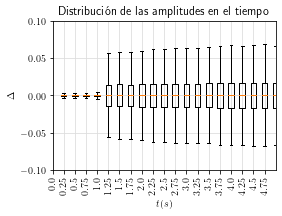

In [145]:
FILE=True
plt.figure(figsize=(4,2.75))

# Creating plot
plt.boxplot(statistics, 0, '')
plt.ylim(-0.1, 0.1)
plt.xlim(0, time_length * (1/SAMPLING_PERIOD))
plt.xlabel('$t(s)$')
plt.ylabel('$\Delta$')
plt.title('Distribución de las amplitudes en el tiempo')
plt.xticks(range(len(statistics)), ['$' + str(i) + '$' for i in np.arange(0, time_length, SAMPLING_PERIOD)], rotation=90)
plt.grid(axis='both', which='major', color='#DDDDDD', linewidth=0.8)
plt.grid(axis='x', which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

# Outputing the plot to an image or showning it
if FILE:
    plt.savefig('meds&stds.png', bbox_inches='tight', dpi=600)
else:
    plt.show()

In [117]:
levels_np = levels_np[0:int(levels_np.shape[0]/2), :]